# Random asset exchange model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

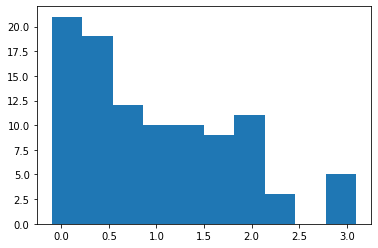

In [2]:
# Basic model
nsteps = 10000
npeople = 100
coin = 0.1

wealth = np.ones(npeople)                           # Init at equal wealth

for t in range(nsteps):
    p1 = np.random.randint(low=0, high=npeople)     # Pick 2 random people
    p2 = np.random.randint(low=0, high=npeople)     # p1 may end up being equal to p2, but it's not gonna break the script.
    if wealth[p1]>0:
        wealth[p1] -= coin                          # Decrease this one
        wealth[p2] += coin                          # But increase this one
        
plt.hist(wealth);

A formula for Gini coefficient ( https://en.wikipedia.org/wiki/Gini_coefficient )

$\displaystyle G(S)=1-{\frac {2}{n-1}}\left(n-{\frac {\sum _{i=1}^{n}iy_{i}}{\sum _{i=1}^{n}y_{i}}}\right).$

In [16]:
# Define a function to calculate Gini coefficient
def gini(x):
    y = np.sort(x) # We need to sort them by wealth
    upper_sum = 0
    n = len(x)
    for i in range(n):
        upper_sum += (i+1)*y[i]
    return 1-2/(n-1)*( n - upper_sum/sum(y) )

# Testing the function:    
print('This should be 0:',gini([1,1,1,1]))
print('This should be 1:',gini([1,0,0,0]))
print('This should be something else:',gini([10,5,1,1]))

This should be 0: 0.0
This should be 1: 1.0
This should be something else: 0.6078431372549019


Text(0, 0.5, 'Gini index')

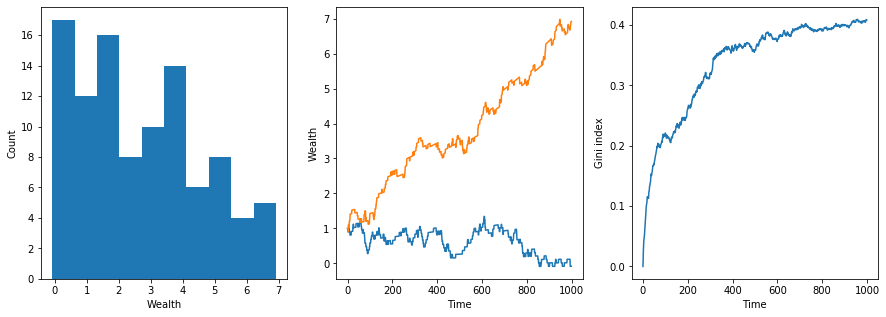

In [17]:
# Remember everything, plot the history.

nsteps = 1000
trades_per_step = 10
npeople = 100
coin = 0.1
interest = 0.001

wealth = np.ones(shape=(nsteps,npeople))
gini_history = np.zeros(nsteps)

for t in range(1,nsteps):                             # We now start at t=1, to be able to refer to t-1 (prev step)
    wealth[t,:] = wealth[t-1,:]*(1+interest)          # By default, wealth at t remains the same as it was at t-1
    for i in range(trades_per_step):                  # Let's make more than 2 ppl trade at each time point.
        p1 = np.random.randint(low=0, high=npeople)   # (It doesn't change the end solution, just makes plots prettier.
        p2 = np.random.randint(low=0, high=npeople)   # It's equivalent to only remembering eath Kth step.)
        if wealth[t,p1]>0:
            wealth[t,p1] -= coin        # Still update in place
            wealth[t,p2] += coin
    gini_history[t] = gini(wealth[t,:]) # Calculate gini index for the current distribution of wealth

# Figures
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(wealth[-1,:],bins=10);
plt.xlabel('Wealth');
plt.ylabel('Count');

plt.subplot(1,3,2);
poor_one = np.argmin(wealth[-1,:])
rich_one = np.argmax(wealth[-1,:])
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
plt.xlabel('Time');
plt.ylabel('Wealth');

plt.subplot(1,3,3)
plt.plot(gini_history);
plt.xlabel('Time');
plt.ylabel('Gini index');